In [5]:
# Step 1: Install necessary libraries
# (Skip if already installed)
!pip install pyspark openpyxl

# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier as SparkRFC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import warnings
warnings.filterwarnings("ignore")

# Step 3: Load dataset
# The file is a CSV, not an Excel file, so use pd.read_csv
df = pd.read_csv("/content/NepalEarhquakeDamage2015.csv")

# Step 4: Inspect data
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Rows:\n", df.head())

Shape: (574039, 17)

Columns: ['building_id', 'district_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'damage_grade']

Data Types:
 building_id               float64
district_id                 int64
count_floors_pre_eq         int64
count_floors_post_eq        int64
age_building                int64
plinth_area_sq_ft           int64
height_ft_pre_eq            int64
height_ft_post_eq           int64
land_surface_condition     object
foundation_type            object
roof_type                  object
ground_floor_type          object
other_floor_type           object
position                   object
plan_configuration         object
condition_post_eq          object
damage_grade               object
dtype: object

Missing Values:
 building_id         

In [8]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier as SparkRFC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

import warnings
warnings.filterwarnings("ignore")

In [10]:
# Step 3: Load dataset
# The file is a CSV, not an Excel file, so use pd.read_csv
df = pd.read_csv("/content/NepalEarhquakeDamage2015.csv")


In [11]:
# Step 4: Inspect data
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Rows:\n", df.head())

Shape: (762106, 17)

Columns: ['building_id', 'district_id', 'count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'damage_grade']

Data Types:
 building_id               float64
district_id                 int64
count_floors_pre_eq         int64
count_floors_post_eq        int64
age_building                int64
plinth_area_sq_ft           int64
height_ft_pre_eq            int64
height_ft_post_eq           int64
land_surface_condition     object
foundation_type            object
roof_type                  object
ground_floor_type          object
other_floor_type           object
position                   object
plan_configuration         object
condition_post_eq          object
damage_grade               object
dtype: object

Missing Values:
 building_id         

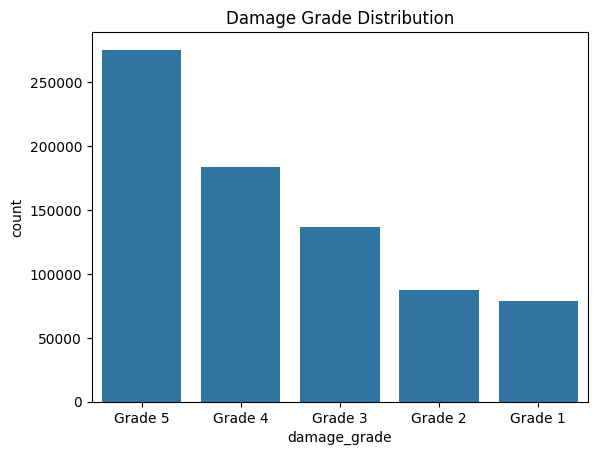

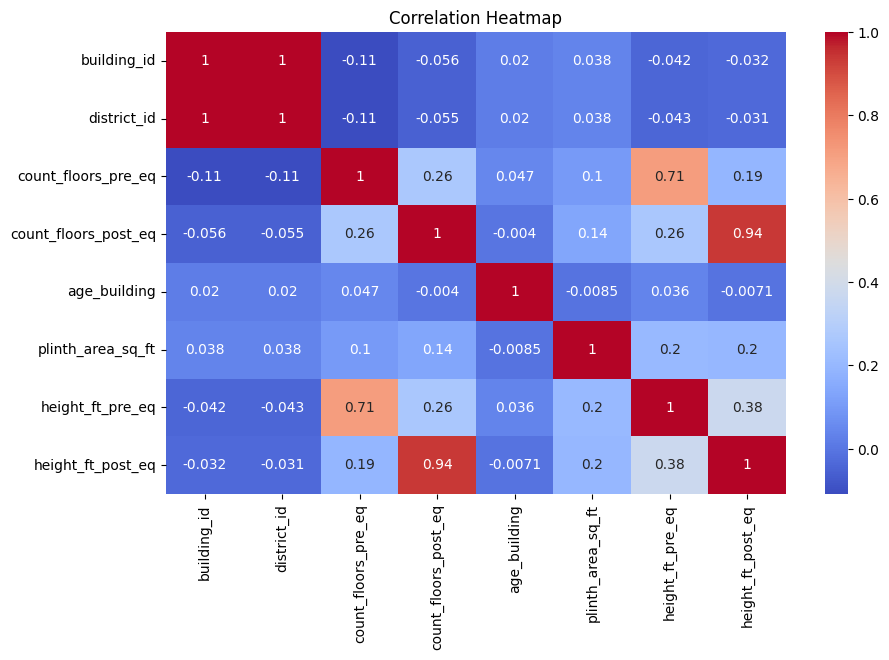

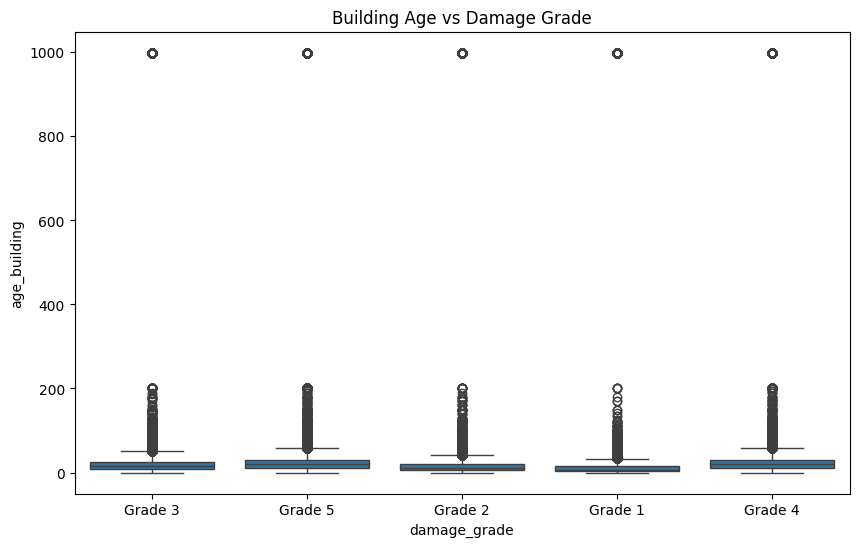

In [15]:
# EDA - Distribution of Target Variable
sns.countplot(data=df, x='damage_grade', order=df['damage_grade'].value_counts().index)
plt.title('Damage Grade Distribution')
plt.show()

# Correlation heatmap for numeric features
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot: Building Age vs Damage Grade
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='damage_grade', y='age_building')
plt.title('Building Age vs Damage Grade')
plt.show()

In [18]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()

# Encode categorical features
for col in df_model.select_dtypes(include='object'):
    if col != 'damage_grade':
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Encode target
target_encoder = LabelEncoder()
df_model['damage_grade'] = target_encoder.fit_transform(df_model['damage_grade'])

# Split data
X = df_model.drop(['damage_grade', 'building_id'], axis=1)
y = df_model['damage_grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_.astype(str)))

Accuracy: 0.7260894096652715

Confusion Matrix:
 [[13617  1429   673   208     4     0]
 [ 1107  7347  5487  3450    54     0]
 [  452  4901 11294 10413   143     0]
 [  134  2400  7924 25982   390     1]
 [    7   101   381  2089 52432     0]
 [    0     1     1     0     0     0]]

Classification Report:
               precision    recall  f1-score   support

     Grade 1       0.89      0.85      0.87     15931
     Grade 2       0.45      0.42      0.44     17445
     Grade 3       0.44      0.42      0.43     27203
     Grade 4       0.62      0.71      0.66     36831
     Grade 5       0.99      0.95      0.97     55010
         nan       0.00      0.00      0.00         2

    accuracy                           0.73    152422
   macro avg       0.56      0.56      0.56    152422
weighted avg       0.73      0.73      0.73    152422



In [21]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import RandomForestClassifier as SparkRFC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Start Spark Session
spark = SparkSession.builder.appName("EarthquakeDamage").getOrCreate()

# Convert Pandas to Spark DataFrame
spark_df = spark.createDataFrame(df)

# StringIndex all string columns and the target column
string_cols = [col for col in spark_df.columns if spark_df.schema[col].dataType.simpleString() == "string"]
indexers = [StringIndexer(inputCol=col, outputCol=col+"_idx", handleInvalid="skip")
            for col in string_cols]

# Feature columns: use the indexed string columns and the numeric columns
indexed_string_cols = [col + "_idx" for col in string_cols if col != "damage_grade"]
numeric_cols = [col for col in spark_df.columns if spark_df.schema[col].dataType.simpleString() != "string" and col != "building_id"]
feature_cols_idx = numeric_cols + indexed_string_cols

# Vector Assembler
assembler = VectorAssembler(inputCols=feature_cols_idx, outputCol="features", handleInvalid="skip")

# Build pipeline
from pyspark.ml import Pipeline
rf = SparkRFC(labelCol="damage_grade_idx", featuresCol="features", numTrees=50) # Use indexed target as label
pipeline = Pipeline(stages=indexers + [assembler, rf])

# Train model
model = pipeline.fit(spark_df)
predictions = model.transform(spark_df)

# Evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="damage_grade_idx", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("PySpark Model Accuracy:", accuracy)

spark.stop()

PySpark Model Accuracy: 0.6958323382836509


In [22]:
# Step 1: Install GPU-compatible XGBoost (Skip if already available)
# Make sure CUDA is available on your machine (e.g., Google Colab has it)
!pip install xgboost


In [23]:
# Step 2: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [24]:
# Step 3: Load data
df = pd.read_csv("NepalEarhquakeDamage2015.csv")  # replace path if needed


In [25]:
# Step 4: Encode categorical features
df_model = df.copy()
for col in df_model.select_dtypes(include='object'):
    if col != 'damage_grade':
        df_model[col] = LabelEncoder().fit_transform(df_model[col])

In [26]:
# Encode target variable
target_encoder = LabelEncoder()
df_model['damage_grade'] = target_encoder.fit_transform(df_model['damage_grade'])

In [27]:
# Step 5: Train-test split
X = df_model.drop(['damage_grade', 'building_id'], axis=1)
y = df_model['damage_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Step 6: Train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    verbosity=1
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
# Step 7: Evaluate
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_.astype(str)))

Accuracy: 0.7371508050019027

Confusion Matrix:
 [[13400  1754   674   102     1     0]
 [  724  7072  5700  3945     4     0]
 [  223  3907 10174 12879    20     0]
 [   51  1227  5974 29503    76     0]
 [    4    61   212  2524 52209     0]
 [    0     0     2     0     0     0]]

Classification Report:
               precision    recall  f1-score   support

     Grade 1       0.93      0.84      0.88     15931
     Grade 2       0.50      0.41      0.45     17445
     Grade 3       0.45      0.37      0.41     27203
     Grade 4       0.60      0.80      0.69     36831
     Grade 5       1.00      0.95      0.97     55010
         nan       0.00      0.00      0.00         2

    accuracy                           0.74    152422
   macro avg       0.58      0.56      0.57    152422
weighted avg       0.74      0.74      0.73    152422

